<a href="https://colab.research.google.com/github/Saliikaa/Customer-Churn-Prediction/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
import nest_asyncio

import numpy as np
from fastapi import FastAPI
import uvicorn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import threading
import pickle



In [38]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [42]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [43]:
df.shape

(7043, 21)

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
#dropping the unnecessay columns
df.drop(['customerID'],axis=1,inplace=True)

In [46]:
for col in df.columns:
  print(col,df[col].unique())
  print("-"* 50)



gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [47]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [48]:
#checking the total empty values
print(len(df[df['TotalCharges']==' ']))


11


In [49]:
#replacing the empty values
df["TotalCharges"]=df["TotalCharges"].replace(" ","0.0")


In [50]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [52]:
#checking for imbalanced data
df["Churn"].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


EDA


In [54]:
def plot_hist(df,columnname):
  plt.figure(figsize=(5,6))
  sns.histplot(df[columnname],kde=True)
  plt.title(f'Distribution of {columnname}')
  #calculate the mean and medain
  col_mean=df[columnname].mean()
  col_med=df[columnname].median()
  plt.axvline(col_mean,color="red",linestyle="--",label="MEAN")
  plt.axvline(col_med,color="green",linestyle="solid",label="MEDIAN")
  plt.legend()
  plt.show()




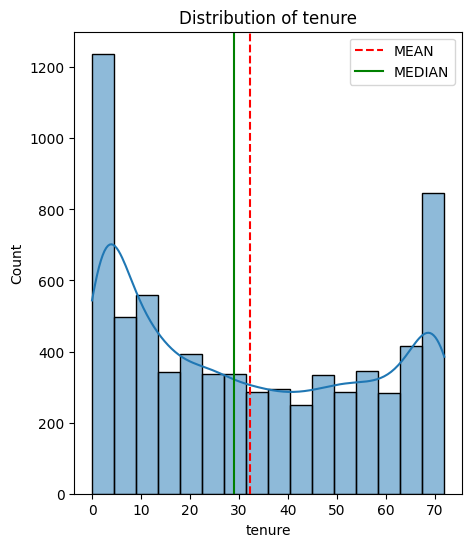

In [55]:
#calling the function
plot_hist(df,'tenure')


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


box plot for numerical values


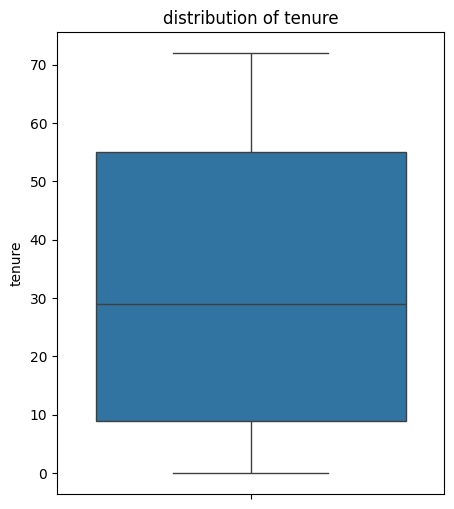

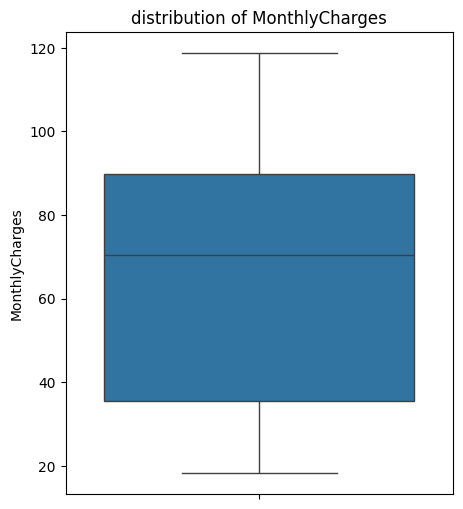

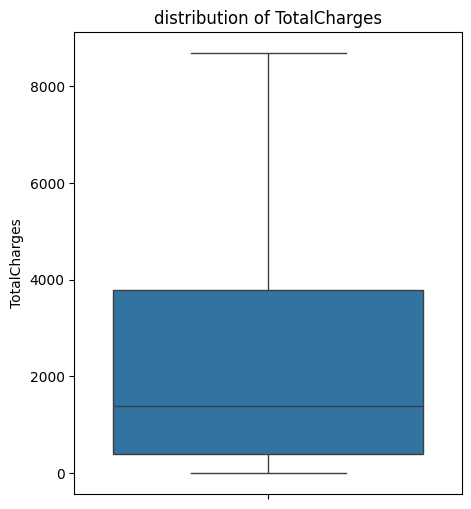

In [57]:
def boxplot(df,column):
  plt.figure(figsize=(5,6))
  sns.boxplot(y=df[column])
  plt.title(f'distribution of {column}')
  plt.ylabel(column)
  plt.show()
boxplot(df,'tenure')
boxplot(df,'MonthlyCharges')
boxplot(df,'TotalCharges')


No outliers found in numerical data
---



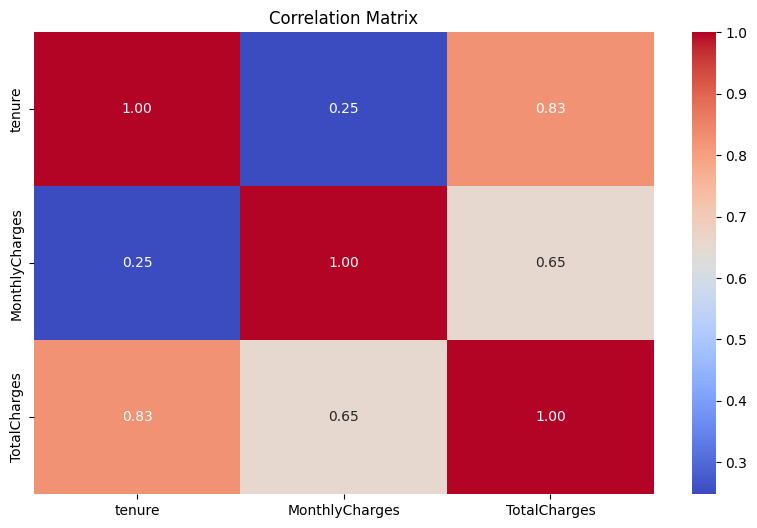

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["tenure",'MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Checkinf outloers for categroical values

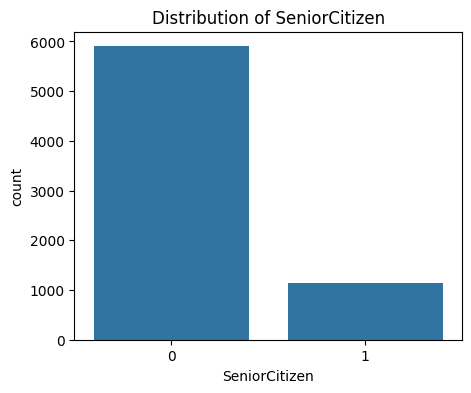

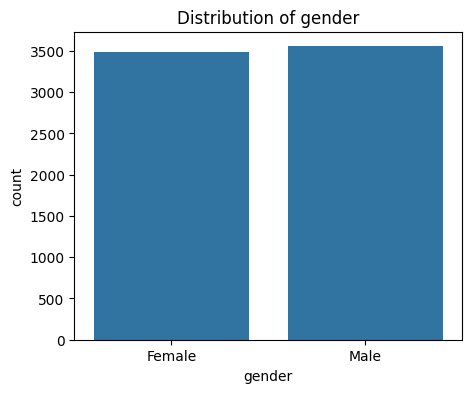

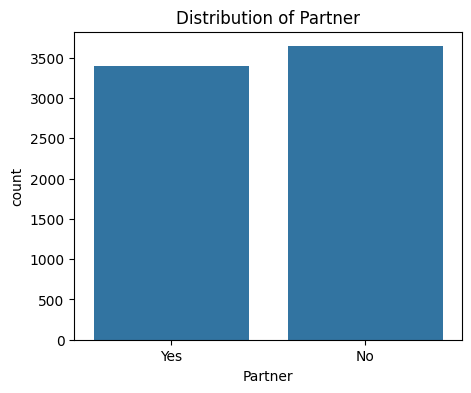

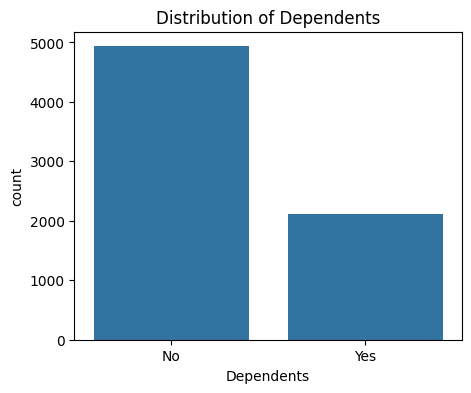

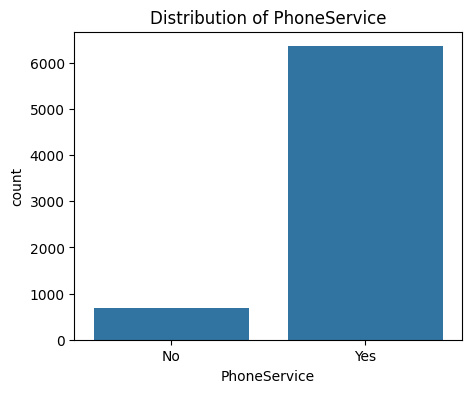

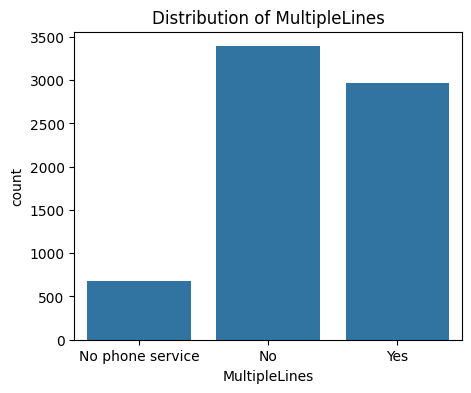

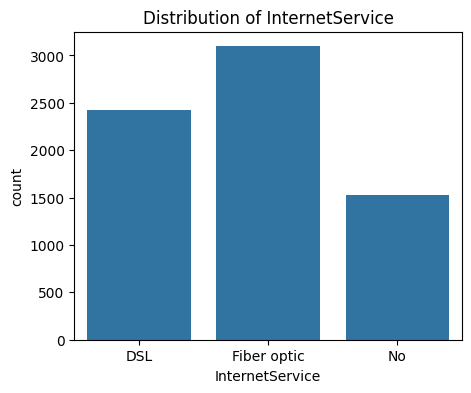

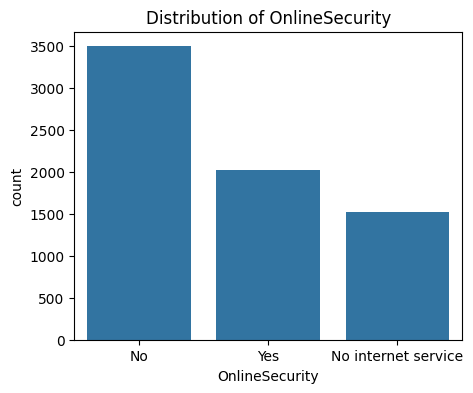

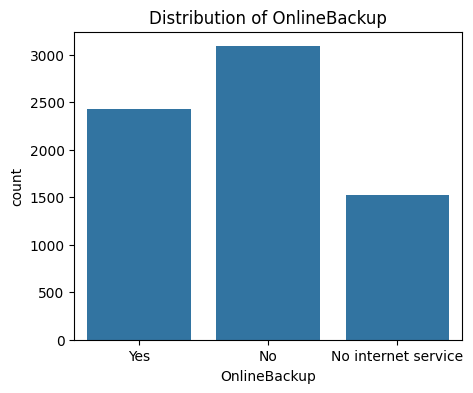

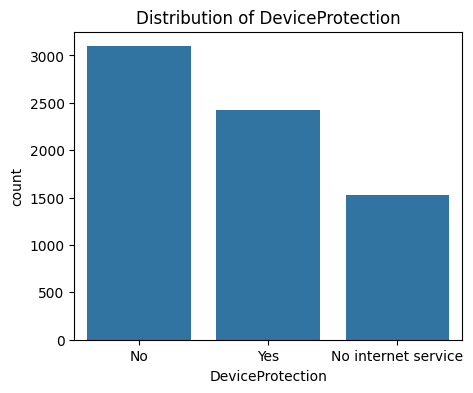

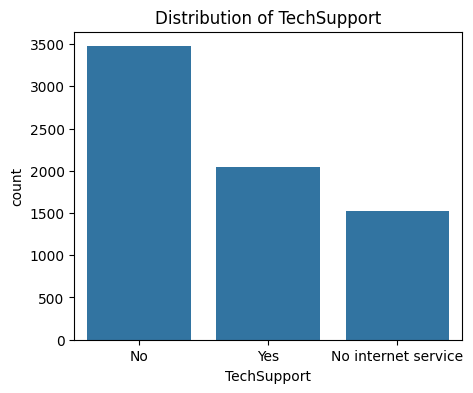

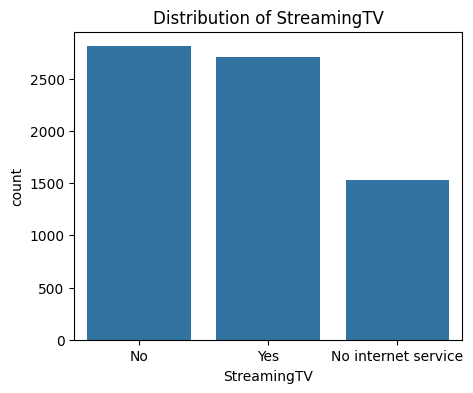

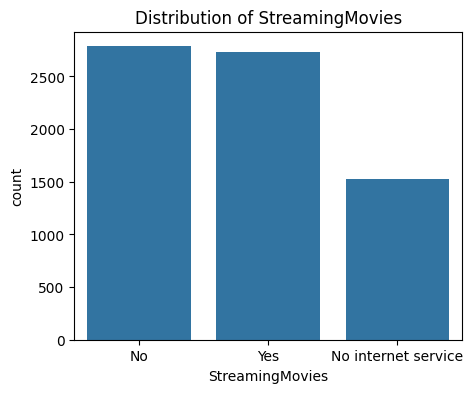

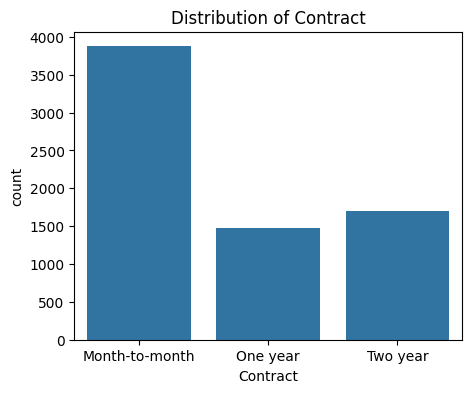

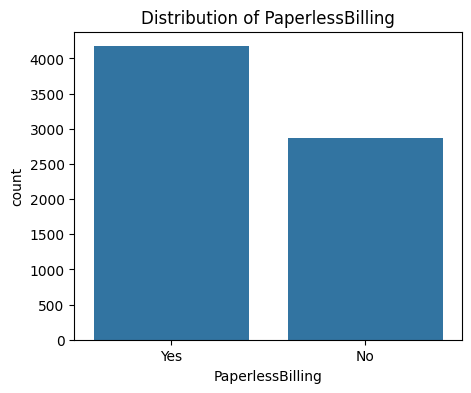

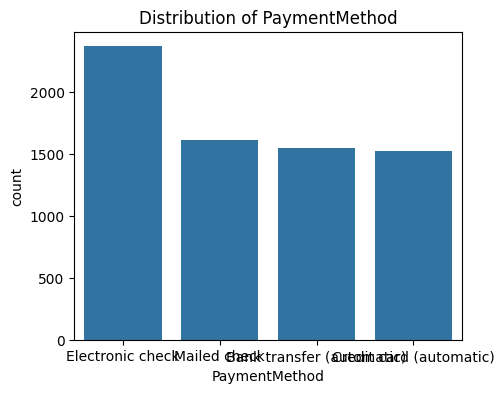

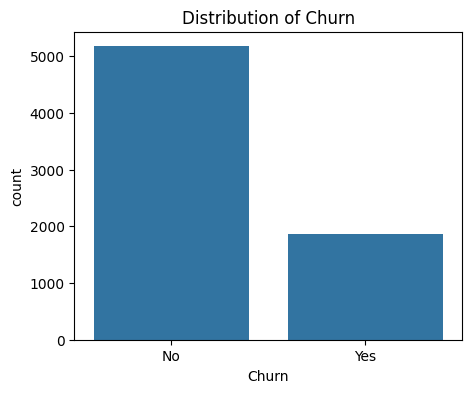

In [59]:
object_col=df.select_dtypes(include="object").columns.to_list()
object_col=['SeniorCitizen']+object_col
for col in object_col:
  plt.figure(figsize=(5,4))
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

In [60]:
df.head(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [61]:
#label encoding ro targetred column
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})
df['Churn'].value_counts()

/tmp/ipython-input-336752327.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})


,count
Churn,
0,5174
1,1869


In [62]:
#finding the binary column
obj_col=[col for col in df.columns if df[col].dtype=='object' and df[col].nunique()==2]
obj_col


['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

Label encoding fro categorical features


In [63]:
target=df["Churn"]
df.drop(columns=["Churn"],inplace=True)
encoders={}
for col in obj_col:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1             

In [64]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'PaperlessBilling': LabelEncoder()}

In [65]:

multi_col = [col for col in df if df[col].dtype=='object' and df[col].nunique() > 2 ]
print(multi_col)
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first',handle_unknown="warn"),multi_col)],remainder='passthrough')



['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [66]:
df_encoded=pd.DataFrame(ct.fit_transform(df),columns=ct.get_feature_names_out(),index=df.index)
print(df_encoded)

      onehot__MultipleLines_No phone service  onehot__MultipleLines_Yes  \
0                                        1.0                        0.0   
1                                        0.0                        0.0   
2                                        0.0                        0.0   
3                                        1.0                        0.0   
4                                        0.0                        0.0   
...                                      ...                        ...   
7038                                     0.0                        1.0   
7039                                     0.0                        1.0   
7040                                     1.0                        0.0   
7041                                     0.0                        1.0   
7042                                     0.0                        0.0   

      onehot__InternetService_Fiber optic  onehot__InternetService_No  \
0                         

In [67]:
encoders_bundle={
    "label encoding":encoders,
    "one hot encoding":ct
}
with open ("Encoder bundle.pkl","wb")as f:
  pickle.dump(encoders_bundle,f)

In [68]:
df_encoded

,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,...,onehot__PaymentMethod_Mailed check,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__MonthlyCharges,remainder__TotalCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,24.0,1.0,1.0,84.80,1990.50
7039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,72.0,1.0,1.0,103.20,7362.90
7040,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,11.0,0.0,1.0,29.60,346.45
7041,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,74.40,306.60


In [69]:
x=df_encoded
y=target
print(df_encoded.shape)
print(target.shape)

(7043, 30)
(7043,)


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [71]:
print(y_train.shape)

(5634,)


In [72]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


SMOTE


In [73]:
smote=SMOTE(random_state=42)
x_trains,y_trains=smote.fit_resample(x_train,y_train)

In [74]:
y_trains.shape

(8276,)

In [75]:
y_trains.value_counts()

,count
Churn,
0,4138
1,4138


Training with default parameters


In [76]:
cv_score={}
models={
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [77]:
for model_name,model in models.items():
  print(f'Traning {model_name} with default parameters')
  scores=cross_val_score(model,x_trains,y_trains,cv=5,scoring="accuracy")
  cv_score[model_name]=scores
  print(f"{model_name}cross-validation accuracy:{np.mean(scores):.2f}")

  print("_"*50)

Traning DecisionTreeClassifier with default parameters
DecisionTreeClassifiercross-validation accuracy:0.80
__________________________________________________
Traning RandomForestClassifier with default parameters
RandomForestClassifiercross-validation accuracy:0.84
__________________________________________________
Traning XGBoost with default parameters
XGBoostcross-validation accuracy:0.83
__________________________________________________


random forest give the best accuracy so we gonna use this algo

In [78]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_trains,y_trains)

RandomForestClassifier(random_state=42)

In [79]:
y_pred=rfc.predict(x_test)
print("ACCURACY SCORE:\n",round(accuracy_score(y_test,y_pred),2))
print("\n")
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_pred))
print("\n")

print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_pred))

ACCURACY SCORE:
 0.79


CONFUSION MATRIX:
 [[926 110]
 [187 186]]


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [80]:
#to save the  trained model
model_data={'model':rfc,'features_name':x.columns.to_list()}
with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)
print("model saved successfully")

model saved successfully


In [81]:
with open("customer_churn_model.pkl","rb") as f:
  loaded_model=pickle.load(f)
print(loaded_model)

print("features_name")

{'model': RandomForestClassifier(random_state=42), 'features_name': ['onehot__MultipleLines_No phone service', 'onehot__MultipleLines_Yes', 'onehot__InternetService_Fiber optic', 'onehot__InternetService_No', 'onehot__OnlineSecurity_No internet service', 'onehot__OnlineSecurity_Yes', 'onehot__OnlineBackup_No internet service', 'onehot__OnlineBackup_Yes', 'onehot__DeviceProtection_No internet service', 'onehot__DeviceProtection_Yes', 'onehot__TechSupport_No internet service', 'onehot__TechSupport_Yes', 'onehot__StreamingTV_No internet service', 'onehot__StreamingTV_Yes', 'onehot__StreamingMovies_No internet service', 'onehot__StreamingMovies_Yes', 'onehot__Contract_One year', 'onehot__Contract_Two year', 'onehot__PaymentMethod_Credit card (automatic)', 'onehot__PaymentMethod_Electronic check', 'onehot__PaymentMethod_Mailed check', 'remainder__gender', 'remainder__SeniorCitizen', 'remainder__Partner', 'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService', 'remainder__Pa

In [82]:
import os

print(os.getcwd())  # prints the current working directory



/content


In [83]:
new_customer = {
    'gender':'Male',
    'SeniorCitizen':1,
    'Partner':'No',
    'Dependents':'Yes',
    'tenure':5,
    'PhoneService':'Yes',
    'MultipleLines':'Yes',
    'InternetService':'Fiber optic',
    'OnlineSecurity':'Yes',
    'OnlineBackup':'No',
    'DeviceProtection':'Yes',
    'TechSupport':'No',
    'StreamingTV':'Yes',
    'StreamingMovies':'No',
    'Contract':'Two year',
    'PaperlessBilling':'No',
    'PaymentMethod':'Mailed check',
    'MonthlyCharges':75.50,
    'TotalCharges':350.0
}
with open("Encoder bundle.pkl","rb") as f:
  encoded_file=pickle.load(f)
label_encoder=encoded_file["label encoding"]
one_hot_encoder=encoded_file["one hot encoding"]
with open("customer_churn_model.pkl","rb") as f:
  loaded_model=pickle.load(f)
model=loaded_model["model"]
# converting the data into dataframe
df_input=pd.DataFrame([new_customer])

In [84]:
for col,le in label_encoder.items():
  df_input[col]=le.transform(df_input[col])
print(df_input)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              1        0           1       5             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           Yes     Fiber optic            Yes           No              Yes   

  TechSupport StreamingTV StreamingMovies  Contract  PaperlessBilling  \
0          No         Yes              No  Two year                 0   

  PaymentMethod  MonthlyCharges  TotalCharges  
0  Mailed check            75.5         350.0  


In [85]:
encoded_input=one_hot_encoder.transform(df_input)
df_encoded_input=pd.DataFrame(encoded_input,columns=one_hot_encoder.get_feature_names_out())
print(df_encoded_input.head())

   onehot__MultipleLines_No phone service  onehot__MultipleLines_Yes  \
0                                     0.0                        1.0   

   onehot__InternetService_Fiber optic  onehot__InternetService_No  \
0                                  1.0                         0.0   

   onehot__OnlineSecurity_No internet service  onehot__OnlineSecurity_Yes  \
0                                         0.0                         1.0   

   onehot__OnlineBackup_No internet service  onehot__OnlineBackup_Yes  \
0                                       0.0                       0.0   

   onehot__DeviceProtection_No internet service  onehot__DeviceProtection_Yes  \
0                                           0.0                           1.0   

   ...  onehot__PaymentMethod_Mailed check  remainder__gender  \
0  ...                                 1.0                1.0   

   remainder__SeniorCitizen  remainder__Partner  remainder__Dependents  \
0                       1.0                 

In [86]:
#prediction
pred=model.predict(df_encoded_input)
prediction_proab=model.predict_proba(df_encoded_input)
print(f"Prediction: {"Churn" if pred[0]==1 else "No Churn"}")
churn=prediction_proab[0][0]#The first [0] ids the customer and the second
#0 is for No Churn and 1 is for Churn
print("Proability of NO Churn",round(churn*100,2),"%")

Prediction: No Churn
Proability of  NO Churn 72.0 %
